Batch Effect Analysis Script

This script provides functions to evaluate batch effects in single-cell RNA-seq. It includes:

1. Batch effect visualization
2. Silhouette score metric for quantifying batch mixing and cluster separation.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import scanpy as sc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig

import ntpath
import glob
import os
import math



In [ ]:
df = pd.read_csv("data"+os.sep+"merged.sce.norm.corrected.csv", index_col=0)

In [ ]:
df

,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AARS1,ABAT,ABCA1,...,ZNF865,SMIM18,TMEM178B,TGFBR3L,MUC22,PCAT1,MYZAP,PTGES3L,PTCSC3,MRPS31P5
gene,,,,,,,,,,,,,,,,,,,,,
Sample_1,3.879807,0.136881,0.039533,0.002018,1.663856,0.155034,4.346274,4.627927,-0.252595,-0.115645,...,0.369764,-0.043244,0.309955,0.251430,0.008324,0.033086,0.240561,0.005052,0.010112,0.071982
Sample_2,3.280135,0.136881,0.039533,0.002018,4.491714,0.155034,0.788771,4.744184,1.084577,-0.115645,...,0.369764,1.144654,0.096611,0.251430,0.008324,0.033086,0.240561,0.005052,0.010112,0.177864
Sample_3,0.765748,0.136881,0.039533,0.002018,2.119166,0.155034,2.942654,2.791081,-0.252595,-0.037787,...,0.369764,-0.043244,0.096611,0.251430,0.008324,0.033086,0.240561,0.005052,0.010112,0.230056
Sample_4,-0.236600,0.136881,0.039533,0.002018,1.663856,0.155034,0.788771,3.368054,2.483051,-0.115645,...,0.369764,-0.043244,0.096611,0.251430,0.008324,0.033086,0.240561,1.460433,0.010112,0.071982
Sample_5,-0.236600,0.136881,5.990127,0.002018,1.663856,0.155034,6.623236,0.292217,2.970848,-0.115645,...,0.369764,-0.043244,0.096611,0.251430,0.008324,0.033086,0.240561,0.005052,0.010112,0.071982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_90,0.403119,-0.029670,-0.192351,-0.001936,1.879186,-0.056028,3.208013,4.901397,3.650397,-0.340686,...,-0.647716,0.007710,-0.841080,0.286301,-0.024459,-0.107911,-0.127062,0.017705,-0.033298,-0.140380
D30-8_91,0.403119,4.371859,2.007920,-0.001936,0.778801,-0.056028,2.787378,3.231515,-0.352571,4.681746,...,-0.647716,0.007710,-0.841080,0.286301,-0.024459,1.374577,-0.127062,0.017705,-0.033298,-0.140380
D30-8_92,0.403119,-0.029670,-0.192351,-0.001936,3.407388,-0.056028,3.171828,3.094250,2.549257,2.561142,...,-0.647716,0.007710,2.582462,0.286301,2.056375,-0.107911,-0.127062,0.017705,-0.033298,-0.140380


In [ ]:
df_label = pd.read_csv("data"+os.sep+"donor_celltype_dataset_rn.csv", index_col=0,sep=";")
df_label

,donor.id,batch,label
Sample_1,Non T2D 1,xin,beta
Sample_2,Non T2D 1,xin,beta
Sample_3,Non T2D 1,xin,beta
Sample_4,Non T2D 1,xin,beta
Sample_5,Non T2D 1,xin,beta
...,...,...,...
D30-8_90,D30,muraro,alpha
D30-8_91,D30,muraro,mesenchymal
D30-8_92,D30,muraro,alpha
D30-8_93,ductal,muraro,ductal


In [ ]:
beforeBatch_df = pd.read_csv("data"+os.sep+"merged.sce.csv", index_col=0)
beforeBatch_df

,A1BG,A2M,NAT1,NAT2,SERPINA3,AADAC,AAMP,AARS1,ABAT,ABCA1,...,ZNF865,SMIM18,TMEM178B,TGFBR3L,MUC22,PCAT1,MYZAP,PTGES3L,PTCSC3,MRPS31P5
gene,,,,,,,,,,,,,,,,,,,,,
Sample_1,47.339600,0.000000,0.000000,0.0,0.000000,0.000000,31.204700,55.586900,0.000000,0.000000,...,0.000000,0.0000,0.461600,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0000
Sample_2,24.045800,0.000000,0.000000,0.0,14.042500,0.000000,0.000000,48.080200,3.514100,0.000000,...,0.000000,2.9424,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.1753
Sample_3,2.274300,0.000000,0.000000,0.0,0.841200,0.000000,7.821400,10.546600,0.000000,0.125700,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.2625
Sample_4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,18.530300,14.114000,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,4.3442,0.0,0.0000
Sample_5,0.000000,0.000000,130.979600,0.0,0.000000,0.000000,120.683200,0.000000,17.953500,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D30-8_90,0.000000,0.000000,0.000000,0.0,1.001958,0.000000,2.007853,5.049473,3.017717,0.000000,...,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0000
D30-8_91,0.000000,11.243324,2.007853,0.0,1.001958,0.000000,4.031579,4.031579,0.000000,17.590756,...,0.000000,0.0000,0.000000,0.0,0.000000,1.001958,0.0,0.0000,0.0,0.0000
D30-8_92,0.000000,0.000000,0.000000,0.0,5.049473,0.000000,3.017717,2.007853,2.007853,2.007853,...,0.000000,0.0000,3.017717,0.0,1.001958,0.000000,0.0,0.0000,0.0,0.0000


UMAP

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_umap(after, before,  batch_series):
  # Example inputs
  # df_before = pd.read_csv("logcounts.csv", index_col=0)     # genes x cells
  # df_after = pd.read_csv("logcounts_limma.csv", index_col=0)
  # batch_series = pd.read_csv("batch_labels.csv")["batch"]   # len = # cells

  # UMAP expects samples (cells) as rows
  X_before = before.values
  X_after = after.values

  # Standardize
  scaler = StandardScaler()
  X_before_scaled = scaler.fit_transform(X_before)
  X_after_scaled = scaler.fit_transform(X_after)

  # UMAP
  reducer = umap.UMAP(random_state=42)
  umap_before = reducer.fit_transform(X_before_scaled)
  umap_after = reducer.fit_transform(X_after_scaled)

  # Plot
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.scatterplot(x=umap_before[:, 0], y=umap_before[:, 1], hue=batch_series,
                  palette='tab10', ax=axes[0])
  axes[0].set_title("Before Batch Correction")

  sns.scatterplot(x=umap_after[:, 0], y=umap_after[:, 1], hue=batch_series,
                  palette='tab10', ax=axes[1])
  axes[1].set_title("After Batch Correction")

  plt.tight_layout()
  plt.savefig(gdrivePath +os.sep+"figures/batcheffect.svg")
  plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
def calculate_silhouette(raw, corrected, batch):
  batch_labels = LabelEncoder().fit_transform(batch)
  print(1 - abs(silhouette_score(raw, batch_labels)))
  print(1 - abs(silhouette_score(corrected, batch_labels)))



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


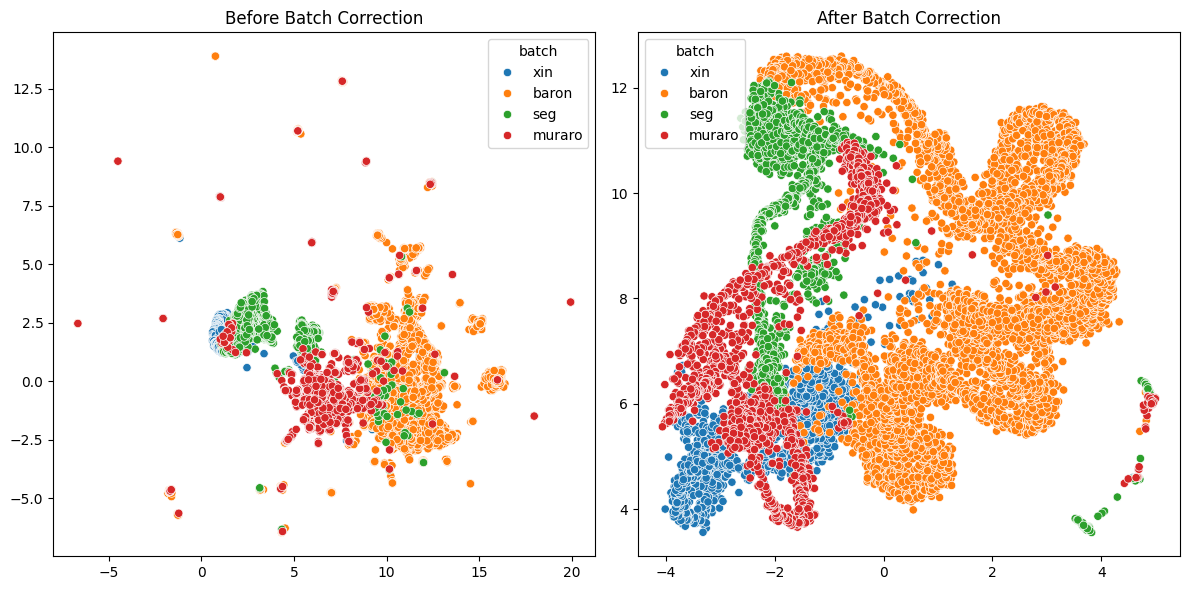

In [ ]:
visualize_umap(df, beforeBatch_df,df_label['batch']) #full data

In [ ]:
calculate_silhouette(beforeBatch_df, df, df_label['batch'])

0.8875535440099405
0.94366787989392
